# Tarea 5: Distribución muestral

Solución de los ejercicios de la sección `Estimación y distribución de muestreo` del libro del curso [Fundamentos Estadísticos](https://tereom.github.io/fundamentos-2022/estimaci%C3%B3n-y-distribuci%C3%B3n-de-muestreo-1.html)

**Proporciones**
<br>Usaremos datos de reincidencia en conducta criminal del estado de Iowa, este estado sigue a los delincuentes por un periodo de 3 años y registra el número de días hasta reincidencia para aquellos que son readmitidos en prisión. El departamento de correcciones utiliza los datos de reincidencia para evaluar sus programas de prevención de recaída en conducta criminal.

Los datos Recidivism contienen información de todos los delincuentes condenados por dos tipos de delito durante 2010 (Recid indica si recayeron en conducta criminal).
* De éstos **31.6%** reincidieron y volvieron a prisión. Utiliza simulación para aproximar la distribución muestral de $\hat{p}$, la proporción de delincuentes que reincidieron para muestras de tamaño 25.
* Calcula el error estándar de $\hat{p}$, y compáralo con el teórico $\sqrt{p(1-p)/n}$.
* Repite para muestras de tamaño 250 y compara

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from utils import ordenar_tendencia_central, tabla_prueba_permutacion

In [2]:
path_universal = "C:\\Users\\Miguel\\Documents\\Github\\itam-mcd"
os.listdir(path_universal)

['.git',
 '.gitignore',
 'aprendizaje-automatico',
 'estadistica-computacional',
 'fundamentos-estadisticos',
 'mineria-analisis-datos',
 'optimizacion',
 'README.md']

In [3]:
path_asignatura = "fundamentos-estadisticos"
path_asignatura = os.path.join(path_universal, path_asignatura)
os.listdir(path_asignatura)

['datos', 'libros', 'README.md']

In [4]:
#Se obtiene dataset original
file_path = "datos\\Recidivism.csv"
recidivism = pd.read_csv(os.path.join(path_asignatura, file_path))
recidivism.head()

,Gender,Age,Age25,Race,Offense,Recid,Type,Days
0,M,Under 25,Under 25,White-NonHispanic,Felony,Yes,Tech,16.0
1,M,55 and Older,Over 25,White-NonHispanic,Felony,Yes,Tech,19.0
2,M,25-34,Over 25,White-NonHispanic,Felony,Yes,Tech,22.0
3,M,55 and Older,Over 25,White-NonHispanic,Felony,Yes,Tech,25.0
4,M,25-34,Over 25,Black-NonHispanic,Felony,Yes,Tech,26.0


In [5]:
recidivism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17022 entries, 0 to 17021
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Gender   17019 non-null  object 
 1   Age      17019 non-null  object 
 2   Age25    17019 non-null  object 
 3   Race     16988 non-null  object 
 4   Offense  17022 non-null  object 
 5   Recid    17022 non-null  object 
 6   Type     17022 non-null  object 
 7   Days     5386 non-null   float64
dtypes: float64(1), object(7)
memory usage: 1.0+ MB


In [6]:
pct_non_null = (recidivism.shape[0] - recidivism['Days'].isna().sum()) / recidivism.shape[0]
print(f"Porcentaje de non-null en 'Days': {pct_non_null*100:.1f}%\n{'_'*40}")

Porcentaje de non-null en 'Days': 31.6%
________________________________________


**Paso 1**:
<br>Se generan las distribuciones muestrales de $\hat{p}$ para muestras de tamaño `25`, `250`

In [7]:
#Serie con variable Days diferente de nulo
non_null_days = recidivism['Days'].loc[recidivism['Days'].isna() == False]

#1,000 iteraciones para muestras tamaño 25
sample_25 = pd.DataFrame({
    'days': [non_null_days.sample(25).mean() for _ in range(1_000)],
    'type': 'sample 25'
})

#1,000 iteraciones para muestras tamaño 250
sample_250 = pd.DataFrame({
    'days': [non_null_days.sample(250).mean() for _ in range(1_000)],
    'type': 'sample 250'
})

#Se concatenan distribuciones en DataFrame único
results = pd.concat([sample_25, sample_250], axis=0, ignore_index=True)
results

,days,type
0,525.240,sample 25
1,607.760,sample 25
2,476.280,sample 25
3,433.240,sample 25
4,623.720,sample 25
...,...,...
1995,446.904,sample 250
1996,465.976,sample 250
1997,482.040,sample 250
1998,454.712,sample 250


**Paso 2**:
<br>Se grafican las distribuciones muestrales

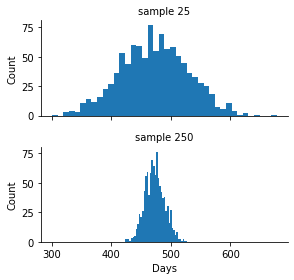

In [8]:
g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'days', bins=40)
g.set_axis_labels('Days', 'Count')
g.set_titles('{col_name}')

plt.show()